In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import sys
sys.path.append("/Users/derekdewald/Documents/Python/Github_Repo/d_py_functions")
random_state = 42

In [ ]:
from DataSets import MNIST_SKLEARN
X_train,y_train,X_test,y_test = MNIST_SKLEARN(flatten=True,normalize=True)

In [ ]:
from Visualization import PlotVectorizedImage
some_digit = X_test[0]
PlotVectorizedImage(some_digit)
plt.show()

In [3]:
from sklearn.linear_model import SGDClassifier 
sgd = SGDClassifier(random_state = random_state)

# Create A Binary Classifier If Metric is 5 or is Not 5.
y_train5 = (y_train==5)
y_test5 = (y_test==5)

sgd.fit(X_train,y_train5)

(60000, 28, 28)
(60000, 784)


SGDClassifier(random_state=42)

#### Stochastic Gradient Descent

In [4]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [6]:
[sgd.predict([X_test[x]]) for x in range(10)]

[array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False])]

In [27]:
from sklearn.model_selection import cross_val_predict, cross_val_score
# Using Cross Validation Test the Score.
print('SGD Score for Is it a 5 Classifier',cross_val_score(sgd,X_train,y_train5,cv=3,scoring='accuracy'))

# What is our Baseline? Technically. 

from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train5)

print('SGD Score for Is it a 5 Classifier',cross_val_score(dummy_clf,X_train,y_train5,cv=3,scoring='accuracy'))
# Is our original performance Good? Given a dummay is 90% accurate, perhaps 95% is not so great...


SGD Score for Is it a 5 Classifier [0.9748 0.9657 0.9692]
SGD Score for Is it a 5 Classifier [0.90965 0.90965 0.90965]


In [8]:
y_train_pred_cv = cross_val_predict(sgd,X_train,y_train5,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train5,y_train_pred_cv)

array([[53613,   966],
       [  840,  4581]])

In [69]:
# Decision Boundary Position
sgd.decision_function(X_test)

# Can manually Overwrite this Decision if Not Happy with Default Position.

# Metric As Decision Scores
y_scores = cross_val_predict(sgd, X_train, y_train5, cv=3,method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train5, y_scores)

In [73]:
from sklearn.metrics import f1_score,roc_auc_score

y_train_pred = cross_val_predict(sgd, X_train, y_train5, cv=3)

print(f1_score(y_train5, y_train_pred))
print(roc_auc_score(y_train5, y_train_pred))


0.8353391684901532
0.9136739621236979


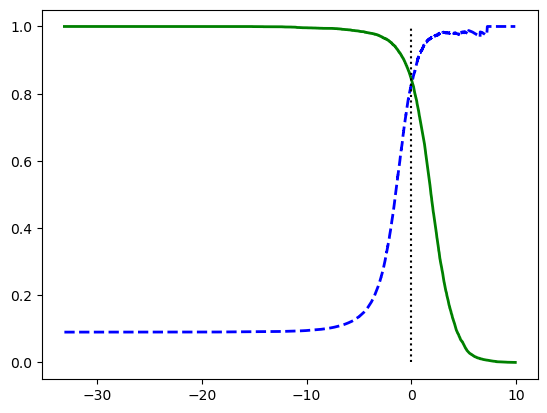

In [48]:
threshold = 0

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show()

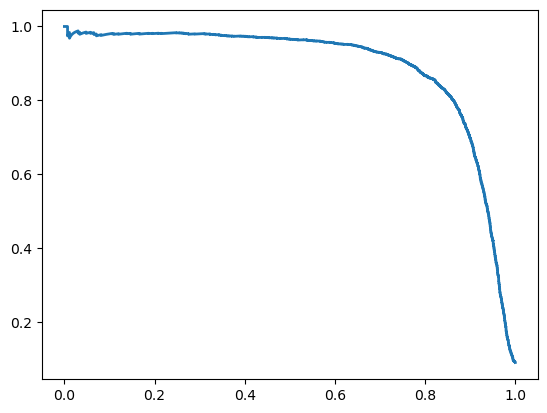

In [49]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [50]:
# Search for position which gives you precision of exactly what you are seeking
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

0.6060137354659978

In [54]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train5, cv=3,
                                    method="predict_proba")

y_probas_forest[:2]

array([[0.11, 0.89],
       [0.98, 0.02]])

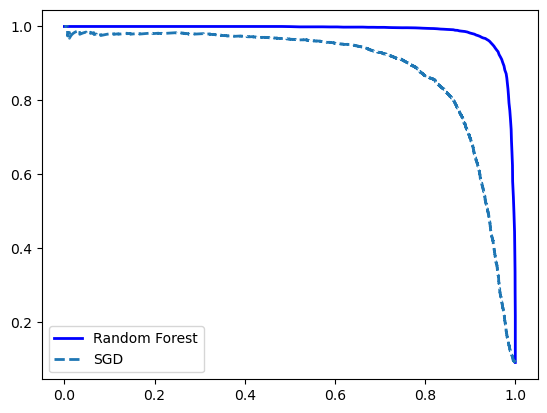

In [58]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train5, y_scores_forest)

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import f1_score,roc_auc_score
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
print(f1_score(y_train5, y_train_pred_forest))
print(roc_auc_score(y_train5, y_scores_forest))


0.9269392958713347
0.9983242898005354


KeyError: 'Title'

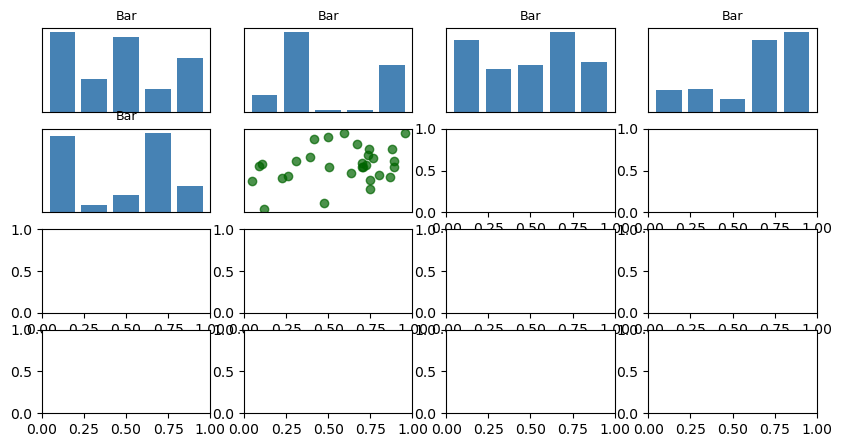

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

# === Step 1: Generate mixed items ===

items = []

# 5 bar charts
for _ in range(5):
    data = np.random.rand(5)
    items.append({'type': 'bar', 'data': data})

# 5 scatter plots
for _ in range(5):
    points = np.random.rand(30, 2)
    items.append({'type': 'scatter', 'data': points})

# 6 image plots (28x28 grayscale)
for _ in range(6):
    image = np.random.rand(28, 28)
    items.append({'type': 'image', 'data': image})

# === Step 2: Define plot function ===

def plot_mixed(ax, item):
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])

    if item['type'] == 'bar':
        ax.bar(range(len(item['data'])), item['data'], color='steelblue')
        ax.set_title("Bar", fontsize=9)
    elif item['type'] == 'scatter':
        ax.scatter(item['data'][:, 0], item['data'][:, 1], alpha=0.7, color='darkgreen')
        ax.set_title(item['Title'], fontsize=9)
    elif item['type'] == 'image':
        ax.imshow(item['data'], cmap='gray')
        ax.set_title(item['Title'], fontsize=9)
    else:
        ax.text(0.5, 0.5, "Unknown", ha='center', va='center')

# === Step 3: Display grid ===

def display_plot_grid(plot_fn, items, cols=4, figsize=(10, 5)):
    num_items = len(items)
    rows = math.ceil(num_items / cols)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_items:
            plot_fn(ax, items[i])
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# === Step 4: Plot ===

display_plot_grid(plot_mixed, items)


In [20]:
def display_plot_grid(plot_fn, data, num_plots=16, cols=4, figsize=(12, 8), titles=None):
    """
    Display a grid of subplots using a custom plotting function like plt.scatter or plt.bar.

    Parameters:
        plot_fn (callable): A function that accepts (ax, datum) and draws on the axis
        data (list-like): A list or array of data objects (e.g., points, histograms)
        num_plots (int): Number of subplots to draw
        cols (int): Number of columns in the grid
        figsize (tuple): Overall figure size
        titles (list or None): Optional list of titles for each subplot
    """
    rows = math.ceil(num_plots / cols)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i in range(rows * cols):
        ax = axes[i]
        ax.clear()
        if i < len(data):
            plot_fn(ax, data[i])
            if titles:
                ax.set_title(titles[i], fontsize=10)
        ax.axis('on' if titles else 'off')

    plt.tight_layout()
    plt.show()




In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

ModuleNotFoundError: No module named 'torchvision'

### Understanding Noise

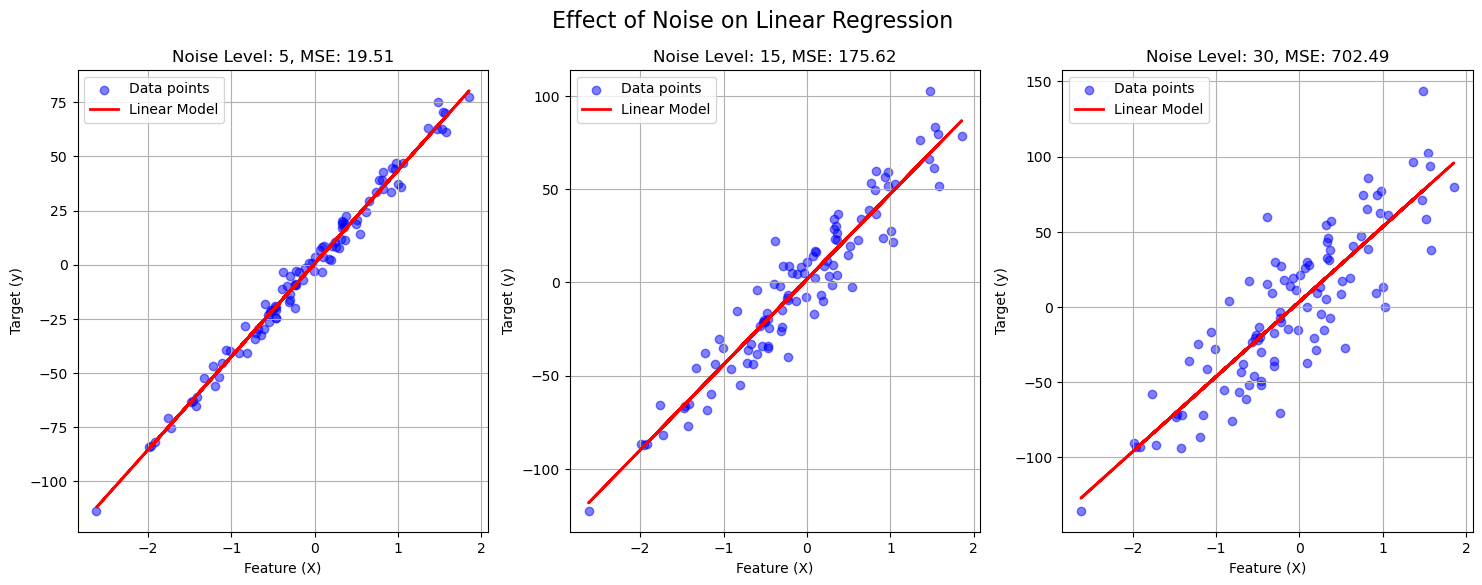

In [2]:
# Define noise levels
noise_levels = [5, 15, 30]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, noise in enumerate(noise_levels):
    # Generate synthetic regression data with different noise levels
    X, y = make_regression(n_samples=100, n_features=1, noise=noise, random_state=42)

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    # Plot the data and regression line
    axes[i].scatter(X, y, color="blue", alpha=0.5, label="Data points")
    axes[i].plot(X, y_pred, color="red", linewidth=2, label="Linear Model")
    axes[i].set_title(f"Noise Level: {noise}, MSE: {mse:.2f}")
    axes[i].set_xlabel("Feature (X)")
    axes[i].set_ylabel("Target (y)")
    axes[i].legend()
    axes[i].grid(True)

# Show the plots
plt.suptitle("Effect of Noise on Linear Regression", fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


# Use Polynomial Regression of degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

# Plot Polynomial Regression
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X, y_poly_pred, color="green", linewidth=2, label="Polynomial Model (Degree 2)")
plt.title("Polynomial Regression (Degree 2) - Noise Level 30")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()


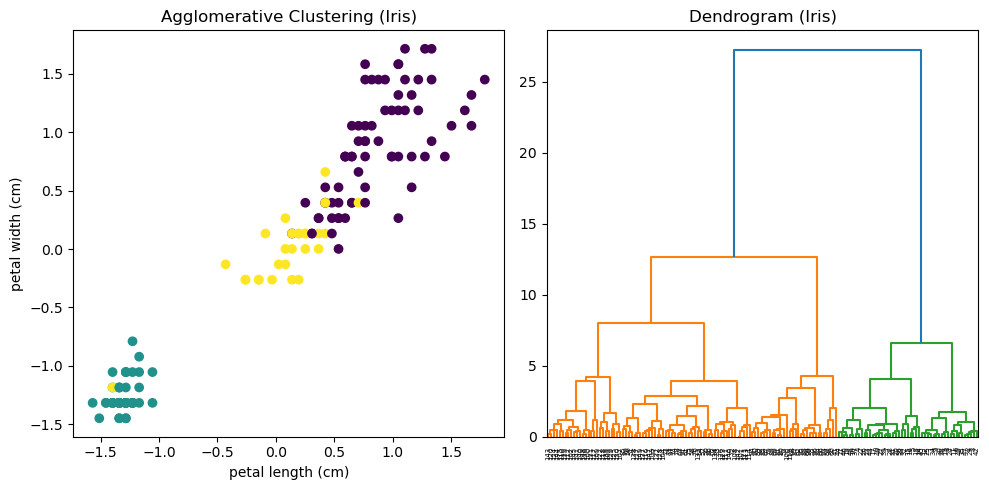

In [16]:
X = iris_df.drop('Target',axis=1).to_numpy()
X_scaled = StandardScaler().fit_transform(X)

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)
feature_names = iris_df.drop('Target',axis=1).columns.tolist()

# 3. Plot the resulting clusters in 2D (using 2 features for simplicity)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (Iris)")
plt.xlabel(feature_names[2])  # petal length
plt.ylabel(feature_names[3])  # petal width

# 4. Create linkage matrix and plot dendrogram
linked = linkage(X_scaled, method='ward')

plt.subplot(1, 2, 2)
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram (Iris)")
plt.tight_layout()
plt.show()

In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict and display results
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print("Predictions:", y_pred_classes.flatten())
print("Actual:", y_test)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_


import mlflow.sklearn
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.utils import all_estimators
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

# Function to run ML pipeline with MLflow tracking
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import all_estimators


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


import matplotlib.pyplot as plt


from mlflow.tracking import MlflowClient

client = MlflowClient()
run_id = runs_df.iloc[0]["run_id"]  # Get the first run's ID
artifacts = client.list_artifacts(run_id)

print("Artifacts stored in MLflow:")
for artifact in artifacts:
    print(artifact.path)


from 



    # Additional models
    extra_models = [
        ("XGBoost", xgb.XGBClassifier() if task_type == "classification" else xgb.XGBRegressor()),
        ("LightGBM", lgb.LGBMClassifier() if task_type == "classification" else lgb.LGBMRegressor()),
        ("CatBoost", cat.CatBoostClassifier(silent=True) if task_type == "classification" else cat.CatBoostRegressor(silent=True))
    ]

    results = []

   
    # Display results in a pandas table
    import ace_tools as tools
    tools.display_dataframe_to_user(name="ML Model Performance with MLflow", dataframe=results_df)

# Example Usage
df = pd.read_csv("path_to_your_dataset.csv")  # Load your dataset
run_ml_pipeline_with_mlflow(df, target_column="target_column_name", task_type="classification")


def MLManualPipeline(df,
                     X_Cols,
                     y_Col,
                     scaler='MinMaxScaler',
                     model_list=['Linear Regression'],
                     test_size=.3,
                     random_state=42):

    if len(X_Cols) == 0:
        X = np.array(df.drop(y_Col,axis=1).copy())
    else:
        X = np.array(df[X_Cols])
    
    y = df[y_Col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    if scaler =='MinMaxScaler':
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

    if len(model_list)==0:
        return X_train,X_test,y_train,y_test
    
    else:
        for model in model_list:
            if model == 'Linear Regression':
                lr = LinearRegression()
                lr.fit(X_train, y_train)
                y_pred_lr = lr.predict(X_test)
                
            elif model =='Logistic Regression':
                logreg=LogisticRegression()
                logreg.fit(X_train, y_train)
                y_pred = logreg.predict(X_test)
                print(f"Logisitic Regression Model:\n{confusion_matrix(y_test, y_pred)}\n{classification_report(y_test, y_pred)})")

            elif model =='Random Forest':
                
                ############################################ ESTIMATORS
                rf = RandomForestClassifier(random_state=random_state, n_estimators=25)
                rf.fit(X_train, y_train)
                y_pred_rf = rf.predict(X_test)
                print(f"Random Forest with 25 Nodes?>?>?>:\n{confusion_matrix(y_test, y_pred_rf)}\n{classification_report(y_test, y_pred_rf)})")

MLManualPipeline(df=df3.drop(['MEMBERNBR','ATTRITION_FLAG_1M'],axis=1),
                 X_Cols="",
                 y_Col='ATTRITION_FLAG_2M',
                model_list=['Logistic Regression','Random Forest'])


model = keras.models.Sequential()

model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dense(2028, activation='tanh'))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1,activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_crossentropy'])

# Train the model
model.fit(X_train.fillna(0), y_train, epochs=50, batch_size=1000, validation_split=0.1, verbose=1)

Feature crosses - add non linear relationships to linear model
Build up intuition gradually by slowly building model up.
Analyze Errors, does it make the mistakes that it’s making.
Accuracy and Error are dependent on a specific chosen threshold and are not differentiable. 
Convexity Good - No matter where you are, you will come to global minimum with following the right direction. 
Multinominal probability distribution - set of numbers equal to 1. 
Most Bias Model - Mean. Simple, Generalizes Well. Undercuts.
Models have noise, if you overfit the noise, it overfits. Variance.
Can perfectly fit n points with Polynomial of N-1. Pure Noise.

- What is your baseline

Output of a prediction, vs output of a bounding window, vs output which highlights area of interest.

Training Population and Usage Population
- NA Testing Group vs Asian Testing Group. Men vs Women. Etc..

Features - Need to generalize. Name of a car vs Engine, Age, Etc.
Turn Learning into a numerical optimization task. Computers really good at this. Opposed to Expert Logic.


Loss Function. 
Model is a function of the inputs. 
Loss is a function of the parameters of the model.
For MSE why a Parabolic Shape? - Squared Function.
Unlikely to generate a single Linear Function that perfectly fits all data points. Need to generate some super complex function
Positive Gradient - Reduce
Negative Gradient - Increase
Convergence / divergence
Greater the slope, the more we want to change

Global vs Local Minimum. No great solution.
Linear regression is convex, always get to global minima

When predicting a car, you need to find common features which generalize well.

Linear Model limitations
- Sensitive to size, color, orientation
- No concept of edges
- No concept of structure relationship between pixels

Edge detection
- Sharp change pixel intensity
- Spatial gradient
- Convolution

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some linear data
np.random.seed(0)
X = np.arange(1, 101).reshape(-1, 1)
y = 3 * X.squeeze() + 10 + np.random.normal(0, 10, X.shape[0])

# Adjusting the data to increase variance on the edges
y_with_more_variance = y.copy()
y_with_more_variance[:10] += np.random.normal(0, 50, 10)
y_with_more_variance[-10:] += np.random.normal(0, 50, 10)

# Create outliers
X_outliers = np.array([[0], [101]])
y_outliers = np.array([300, -100])

# Reducing the number of data points by 20%
reduction_factor = 0.8
num_points = int(len(X) * reduction_factor)

# Select a subset of the data
X_reduced = X[:num_points]
y_reduced = y_with_more_variance[:num_points]

# Combine reduced data with outliers
X_reduced_with_outliers = np.vstack([X_reduced, X_outliers])
y_reduced_with_outliers = np.concatenate([y_reduced, y_outliers])

# Fit linear models
model_reduced = LinearRegression().fit(X_reduced, y_reduced)
model_reduced_with_outliers = LinearRegression().fit(X_reduced_with_outliers, y_reduced_with_outliers)

# Predictions
y_pred_reduced = model_reduced.predict(X_reduced)
y_pred_reduced_with_outliers = model_reduced_with_outliers.predict(X_reduced_with_outliers)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_reduced, y_reduced, label='Reduced Data with More Variance', color='blue')
plt.scatter(X_outliers, y_outliers, label='Outliers', color='red')
plt.plot(X_reduced, y_pred_reduced, label='Model with Reduced Data', color='green', linewidth=2)
plt.plot(X_reduced_with_outliers, y_pred_reduced_with_outliers, label='Model with Reduced Data and Outliers', color='orange', linewidth=2, linestyle='dashed')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Effect of Outliers, Increased Variance, and Reduced Data on Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt

# Given data points
word_counts = [100000, 1000000, 10000000, 100000000, 1000000000]
memory_based_accuracies = [0.82, 0.85, 0.90, 0.92, 0.93]
naive_bayes_accuracies = [0.80, 0.85, 0.91, 0.94, 0.96]
winnow_accuracies = [0.75, 0.80, 0.87, 0.95, 0.96]
perceptron_accuracies = [0.79, 0.83, 0.895, 0.94, 0.955]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(word_counts, naive_bayes_accuracies, label='Naive Bayes', marker='o')
plt.plot(word_counts, perceptron_accuracies, label='Perceptron', marker='o')
plt.plot(word_counts, winnow_accuracies, label='Winnow', marker='o')
plt.plot(word_counts, memory_based_accuracies, label='Memory-based (KNN)', marker='o')

plt.xscale('log')
plt.xlabel('Number of Words')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Words on Model Performance')
plt.legend()
plt.ylim(.65, 1)
plt.grid(True)
plt.show()

# Generate a simple linearly separable dataset
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=6)

# Fit SVM classifier with linear kernel
clf = SVC(kernel='linear', C=1E10)
clf.fit(X, y)

# Function to plot hyperplane and margins
def plot_svm(clf, X, y, show_alternative=True):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30, edgecolors='k')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Highlight support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    # Plot alternative hyperplanes (to show why SVM selects the optimal one)
    if show_alternative:
        w = clf.coef_[0]
        b = clf.intercept_[0]
        
        # Slightly rotated hyperplanes to show suboptimal cases
        for delta in [-0.5, 0.5]:
            yy_alt = -(w[0] * xx + b + delta) / w[1]
            plt.plot(xx, yy_alt, 'r--', alpha=0.3, label='Alternative Hyperplanes' if delta == -0.5 else "")

    plt.title('SVM: Optimal Hyperplane and Margin')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plotting the SVM with alternative hyperplanes
plot_svm(clf, X, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)

X_smooth = np.linspace(-3, 3, 100).reshape(-1, 1)  # Smooth X values
X_smooth_poly = poly.transform(X_smooth)  # Transform smooth X

# Predict y values for smooth X range
y_pred_smooth = model.predict(X_smooth_poly)

mport numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data
n = 100
X = 6 * np.random.rand(n, 1) - 3  # Features
y = 0.5 * X**2 + X + 2 + np.random.rand(n, 1)  # Quadratic function with noise
X_smooth = np.linspace(-3, 3, 100).reshape(-1, 1)  # Smooth X values

# Do Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred_linear = model.predict(X_smooth)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Generate a smooth curve for prediction
X_smooth_poly = poly.transform(X_smooth)  # Transform smooth X

# Predict y values for smooth X range
y_pred_smooth = model.predict(X_smooth_poly)

# Plot data points and the model prediction curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_smooth, y_pred_smooth, color="red", linewidth=2, label="Polynomial Model")
plt.plot(X_smooth, y_pred_linear, color="green", linewidth=2, label="Linear Model")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X, y, color="blue", label="Data points")
axes[1].scatter(X, y_pred_smooth, color="red", label="Data points")


plt.show()

import time
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
from sklearn.utils import all_estimators
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_iris,load_wine
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Define default hyperparameters
default_parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'lambda': [0, 0.01, 0.1, 1, 10],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Function to filter valid hyperparameters
def filter_valid_hyperparams(model, param_grid):
    """Filter hyperparameters to only include those valid for the model."""
    valid_params = model.get_params().keys()
    return {k: v for k, v in param_grid.items() if k in valid_params}

# Get all available models
model_list = all_estimators(type_filter="classifier")  # Using only classifiers for Iris dataset

# Placeholder for results
results = []

# Start MLflow experiment
mlflow.set_experiment("Auto-Model Selection & Tuning")

# Loop through each model and apply either direct training or hyperparameter tuning
for name, model_class in model_list:
    try:
        model = model_class()  # Initialize the model instance
        start_time = time.time()

        # Get valid hyperparameters
        valid_params = filter_valid_hyperparams(model, default_parameters)
        print(model,valid_params)

        with mlflow.start_run(run_name=name):  # Start MLflow run

            # If valid hyperparameters exist, perform hyperparameter tuning
            if valid_params:
                search = RandomizedSearchCV(model, valid_params, n_iter=5, cv=3, scoring="accuracy", n_jobs=-1)
                search.fit(X_train, y_train)  # Perform hyperparameter search
                model = search.best_estimator_  # Use the best model
                mlflow.log_params(search.best_params_)  # Log best hyperparameters
                
                for i in range(len(search.cv_results_["params"])):
                    params = search.cv_results_["params"][i]
                    mean_test_score = search.cv_results_["mean_test_score"][i]
                    
                    param_str = "_".join(f"{k}-{v}" for k, v in params.items())
                    mlflow.log_metric(f"Test_Accuracy_{param_str}", mean_test_score)
                    
            else:
                model.fit(X_train, y_train)  # Train model without hyperparameter tuning

            # Predict and evaluate performance
            
            x_train_pred = model.predict(X_train)
            metric_train = accuracy_score(y_train, x_train_pred)
            mlflow.log_metric("Accuracy Train", metric_train)
            
            y_pred = model.predict(X_test)
            metric_test = accuracy_score(y_test, y_pred)  # Classification Accuracy
            mlflow.log_metric("Accuracy Test", metric_test)

            # Log model in MLflow
            mlflow.sklearn.log_model(model, name)

            # Log metadata
            mlflow.log_param("Model", name)
            mlflow.log_param("Training Time", round(time.time() - start_time, 2))

            # Append results
            results.append({
                "Model": name,
                "Train Accuracy": metric_train,
                "Test Accuracy":metric_test,
                "Time (s)": round(time.time() - start_time, 2),
                "Hyperparameters Used": bool(valid_params)  # Flag if hyperparameters were tuned
            })

    except Exception as e:
        print(f"{name} failed: {str(e)}")  # Handle errors but continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


experiment = mlflow.get_experiment_by_name("Auto-Model Selection & Tuning")
print(f"Experiment ID: {experiment.experiment_id}")

# Get All Runs in the Experiment
df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
print(df.head()) 

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target  # Continuous target variable

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Check data dimensions

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', RandomForestRegressor(random_state=42))  # Model
])

from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid,
    n_iter=10, cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, random_state=42
)

# Train with hyperparameter tuning
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)


import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select relevant columns
results_df = results_df[
    [
        "mean_test_score",  # Mean score across all CV folds
        "std_test_score",   # Standard deviation across CV folds
        "rank_test_score",  # Rank of the model (lower is better)
        "param_regressor__n_estimators",
        "param_regressor__max_depth",
        "param_regressor__min_samples_split",
        "param_regressor__min_samples_leaf",
    ]
]

# Sort by best score
results_df = results_df.sort_values(by="rank_test_score")

results_df